# Proyecto de curso: Analisis y visualización a la base de datos de hongos

Santiago Florian Bustamante - *santiflo17@gmail.com* - Universidad Nacional de Colombia

## Introducción
El siguiente Notebook tiene objetivos el realizar el análisis y visualización sobre la base de datos de hongos. Con el fin de seguir la metodología **CRISP-DM** propuesta en el curso y que sea de fácil entendimiento del documento, el archivo se divide según la metodología propuesta. La primera parte se habla del entendimiento del negocio, donde se fijan los objetivos del proyecto. En la segunda parte se realiza un análisis de los datos y se toman decisiones sobre su manejo según sean los hallazgos. En la tercera parte se preparan los datos, donde se realiza una limpieza y transformación de datos para su posterior manejo. En la cuarta parte se realiza un análisis de los datos y resultados obtenidos. Como quinta y última parte se realiza una conclusión sobre los resultados obtenidos


## Entendimiento del negocio
El siguiente análisis básico de datos se realiza con el fin de poner en práctica las habilidades adquiridas durante el curso de análisis y visualización de datos con Python. Se tomará la base de datos hongos, con el fin de encontrar los atributos que puedan identificar cuando un hongo es clase comestible o venenosa, para al final obtener un modelo de regresión logística que pueda describir la clase de hongo dado los valores de sus atributos


## Entendimiento de los datos

### adquisición e integración de los datos
El conjunto de datos fue obtenido mediante la página web https://archive.ics.uci.edu/ que tiene múltiples bases de datos libres con las cuales trabajar para el aprendizaje de IA y ML. Los registros de los hongos fueron obtenidos de múltiples fuentes como lo son la guía de campo del norte de la Sociedad Audubon de los estados unidos tomada el 27 de abril de 1987. El conjunto de datos incluye descripciones de muestras hipotéticas correspondientes a 23 especies de hongos con branquias de las familias Agaricus y Lepiota. Cada especie se identifica como de manera definitiva comestible, definitivamente venenosa o de comestibilidad desconocida y no recomendada. Esta última clase se combinó con la venenosa. La Guía establece claramente que no existe una regla sencilla para determinar la comestibilidad de un hongo.


In [1]:
# import
import pandas as pd # Manejo de conjuntos de datos
from sklearn.preprocessing import LabelEncoder # Funcion para transformar datos categoricos a numericos y viceversa
import seaborn as sns # Mostrar graficos estadisticos
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

In [2]:
# Variable definition
names = ['classes','cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
mushroom_ds = pd.read_csv('data/agaricus-lepiota_expanded.data', names = names)


### Atributos
El conjunto de datos cuenta con **8124** registros y **22 atributos de tipo nominal y la clase a la que pertenece cada registro**. A continuación, se explicará cada uno de sus atributos


In [3]:
mushroom_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   classes                   8416 non-null   object
 1   cap-shape                 8416 non-null   object
 2   cap-surface               8416 non-null   object
 3   cap-color                 8416 non-null   object
 4   bruises?                  8416 non-null   object
 5   odor                      8416 non-null   object
 6   gill-attachment           8416 non-null   object
 7   gill-spacing              8416 non-null   object
 8   gill-size                 8416 non-null   object
 9   gill-color                8416 non-null   object
 10  stalk-shape               8416 non-null   object
 11  stalk-root                8416 non-null   object
 12  stalk-surface-above-ring  8416 non-null   object
 13  stalk-surface-below-ring  8416 non-null   object
 14  stalk-color-above-ring  

1. **cap-shape**: forma del sombrero.
2. **cap-surface**: superficie del sombrero.
3. **cap-color**: color del sombrero.
4. **bruises?**: Presenta moretones?.
5. **odor**: Olor del hongo.
6. **gill-attachment**: Tipos de membranas.
7. **gill-spacing**: Distancia entre las membranas.
8. **gill-size**: Tamaño de las membranas.
9. **gill-color**: Color de las membranas.
10. **stalk-shape**: Forma del tallo.
11. **stalk-root**: Raíz del tallo.
12. **stalk-surface-above-ring**: Superficie del tallo sobre el anillo.
13. **stalk-surface-below-ring**: Superficie del tallo bajo el anillo.
14. **stalk-color-above-ring**: Color del tallo sobre el anillo.
15. **stalk-color-below-ring**: Color del tallo bajo el anillo.
16. **veil-type**: Tipo de velo.
17. **veil-color**: Color del velo.
18. **ring-number**: Numero de anillos.
19. **ring-type**: Tipo de anillo.
20. **spore-print-color**: dasolor de las esporas.
21. **population**: Población de hongos.
22. **habitat**: Habitad.
23. **classes**: Clase de hongo.

Con el fin de entender un poco más a que se refiere cada atributo, en la siguiente imagen se puede visualizarla anatomía de un hongo


<img src='https://grocycle.com/wp-content/uploads/2021/08/partd-diagram.jpg' width="250">

### Análisis exploratorio
#### Distribución
El conjunto de datos se encuentra clasificado en dos clases e y p, que significa, comestible y venenosa respectivamente:
 - Comestible con 4208 registros, equivalentemente al 51.8% de la muestra.
 - Venenoso con 3916 registros, equivalentemente al 48.2% de la muesra.


In [4]:
e,p = mushroom_ds['classes'].value_counts()
print(f'Se cuenta con {e} registros, que equivalen al {100*e/(mushroom_ds.shape[0]):.2f}% de la muestra es comestible')
print(f'Se cuenta con {p} registros, que quivalen al {100*p/(mushroom_ds.shape[0]):.2f}% de la muestra es venenosa')

Se cuenta con 4488 registros, que equivalen al 53.33% de la muestra es comestible
Se cuenta con 3928 registros, que quivalen al 46.67% de la muestra es venenosa


<Axes: title={'center': 'Cantidad de hongos de la muestra por clase'}, xlabel='classes', ylabel='Cantidad'>

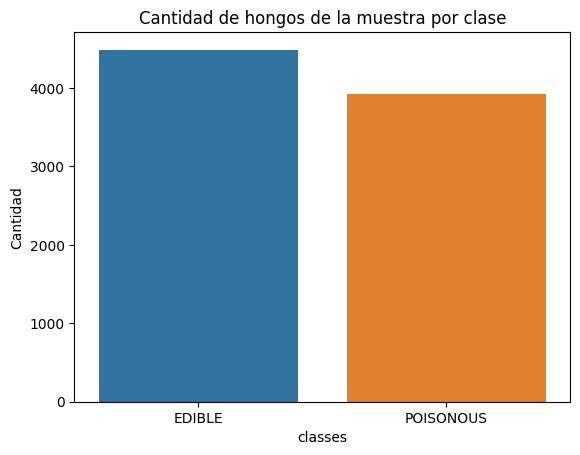

In [5]:
count_classes_graph = sns.countplot(
    x='classes',
    data=mushroom_ds)
count_classes_graph.set_title('Cantidad de hongos de la muestra por clase')
count_classes_graph.set_ylabel('Cantidad')
count_classes_graph

Se puede identificar que las clases están ligeramente desbalanceadas brindando un poco más de información para los hongos comestibles

#### Valores nulos
El conjunto de datos cuenta con *2480* valores nulos para el atributo **12 stalk-root** identificado con el valor de *?


In [6]:
nan_e, nan_p = mushroom_ds[mushroom_ds['stalk-root']=='?']['classes'].value_counts()
print(f'La clase comestible tiene {nan_e} registros con valores faltanes, lo que equivale al {100*nan_e/(mushroom_ds.shape[0]):.2f}% de la muestra')
print(f'La clase venenosa tiene {nan_p} registros con valores faltanes, lo que equivale al {100*nan_p/(mushroom_ds.shape[0]):.2f}% de la muestra')
print(f'Para un total de {nan_e+nan_p} registros con valores nulos')

La clase comestible tiene 1760 registros con valores faltanes, lo que equivale al 20.91% de la muestra
La clase venenosa tiene 720 registros con valores faltanes, lo que equivale al 8.56% de la muestra
Para un total de 2480 registros con valores nulos


Al eliminar los registros que cuentan con datos faltantes se crea una nueva muesta con un total de 5644, aumentando su desvalanceo favoreciendo aun mas a la clase comestible

In [7]:
new_mushroom_ds = mushroom_ds[mushroom_ds['stalk-root']!='?'].copy()
new_mushroom_ds.shape[0]

5936

In [8]:
new_e, new_p = new_mushroom_ds['classes'].value_counts()
print(f'Se cuenta con {new_e} registros para la clase comestible despues de eliminar los valores faltantes, lo que equivale al {100*new_e/(new_mushroom_ds.shape[0]):.2f}% de la nueva muestra')
print(f'Se cuenta con {new_p} registros para la clase venenosa despues de eliminar los valores faltantes, lo que equivale al {100*new_p/(new_mushroom_ds.shape[0]):.2f}% de la nueva muestra')

Se cuenta con 3768 registros para la clase comestible despues de eliminar los valores faltantes, lo que equivale al 63.48% de la nueva muestra
Se cuenta con 2168 registros para la clase venenosa despues de eliminar los valores faltantes, lo que equivale al 36.52% de la nueva muestra


<Axes: title={'center': 'Cantidad de hongos hongos de la muestra por clase sin valores nulos'}, xlabel='classes', ylabel='Cantidad'>

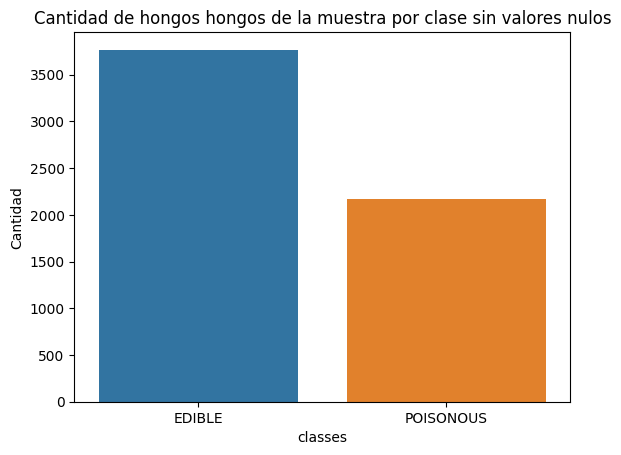

In [9]:
count_classes_graph = sns.countplot(
    x='classes',
    data=new_mushroom_ds)
count_classes_graph.set_title('Cantidad de hongos hongos de la muestra por clase sin valores nulos')
count_classes_graph.set_ylabel('Cantidad')
count_classes_graph

Por tanto se toma la desición de no modificar el conjunto de datos, ya que, por un lado genera un gran desbalance entre las clases y por el otro, al ser un analisis de tipo exploratorio se deben tomar todos los datos para conseguir una mejor representación de lo que se supone el mundo real.

#### Medidas de tendecia central
Debido a que todos los datos son nominales no ordinales, solo se puede tener como medida de tenedencia central la moda

In [10]:
for i in names: 
    print(f'{i}: {new_mushroom_ds[i].mode().values}')

classes: ['EDIBLE']
cap-shape: ['CONVEX']
cap-surface: ['FIBROUS']
cap-color: ['GRAY']
bruises?: ['BRUISES']
odor: ['NONE']
gill-attachment: ['FREE']
gill-spacing: ['CLOSE']
gill-size: ['BROAD']
gill-color: ['PINK']
stalk-shape: ['TAPERING']
stalk-root: ['BULBOUS']
stalk-surface-above-ring: ['SMOOTH']
stalk-surface-below-ring: ['SMOOTH']
stalk-color-above-ring: ['WHITE']
stalk-color-below-ring: ['WHITE']
veil-type: ['PARTIAL']
veil-color: ['WHITE']
ring-number: ['ONE']
ring-type: ['PENDANT']
spore-print-color: ['BROWN']
population: ['SEVERAL']
habitat: ['WOODS']


A continuación se puede observar la distribución que tienen cada uno de los atributos de la nueva muestra de hongos sin valores nulos. En las siguientes secciones se abordaran las distribuciones mediante graficas con el fin de tener un mayor entendimiento de los datos por clase.

In [11]:
for i in names: 
    print(f'{i}: {mushroom_ds[i].value_counts()}')

classes: classes
EDIBLE       4488
POISONOUS    3928
Name: count, dtype: int64
cap-shape: cap-shape
CONVEX     3796
FLAT       3292
KNOBBED     840
BELL        452
SUNKEN       32
CONICAL       4
Name: count, dtype: int64
cap-surface: cap-surface
SCALY      3268
SMOOTH     2684
FIBROUS    2460
GROOVES       4
Name: count, dtype: int64
cap-color: cap-color
BROWN       2320
GRAY        2096
RED         1500
YELLOW      1072
WHITE       1040
BUFF         168
PINK         144
CINNAMON      44
PURPLE        16
GREEN         16
Name: count, dtype: int64
bruises?: bruises?
NO         5040
BRUISES    3376
Name: count, dtype: int64
odor: odor
NONE        3808
FOUL        2160
FISHY        576
SPICY        576
ALMOND       400
ANISE        400
PUNGENT      256
CREOSOTE     192
MUSTY         48
Name: count, dtype: int64
gill-attachment: gill-attachment
FREE        8200
ATTACHED     216
Name: count, dtype: int64
gill-spacing: gill-spacing
CLOSE      6824
CROWDED    1592
Name: count, dtype: int64
g

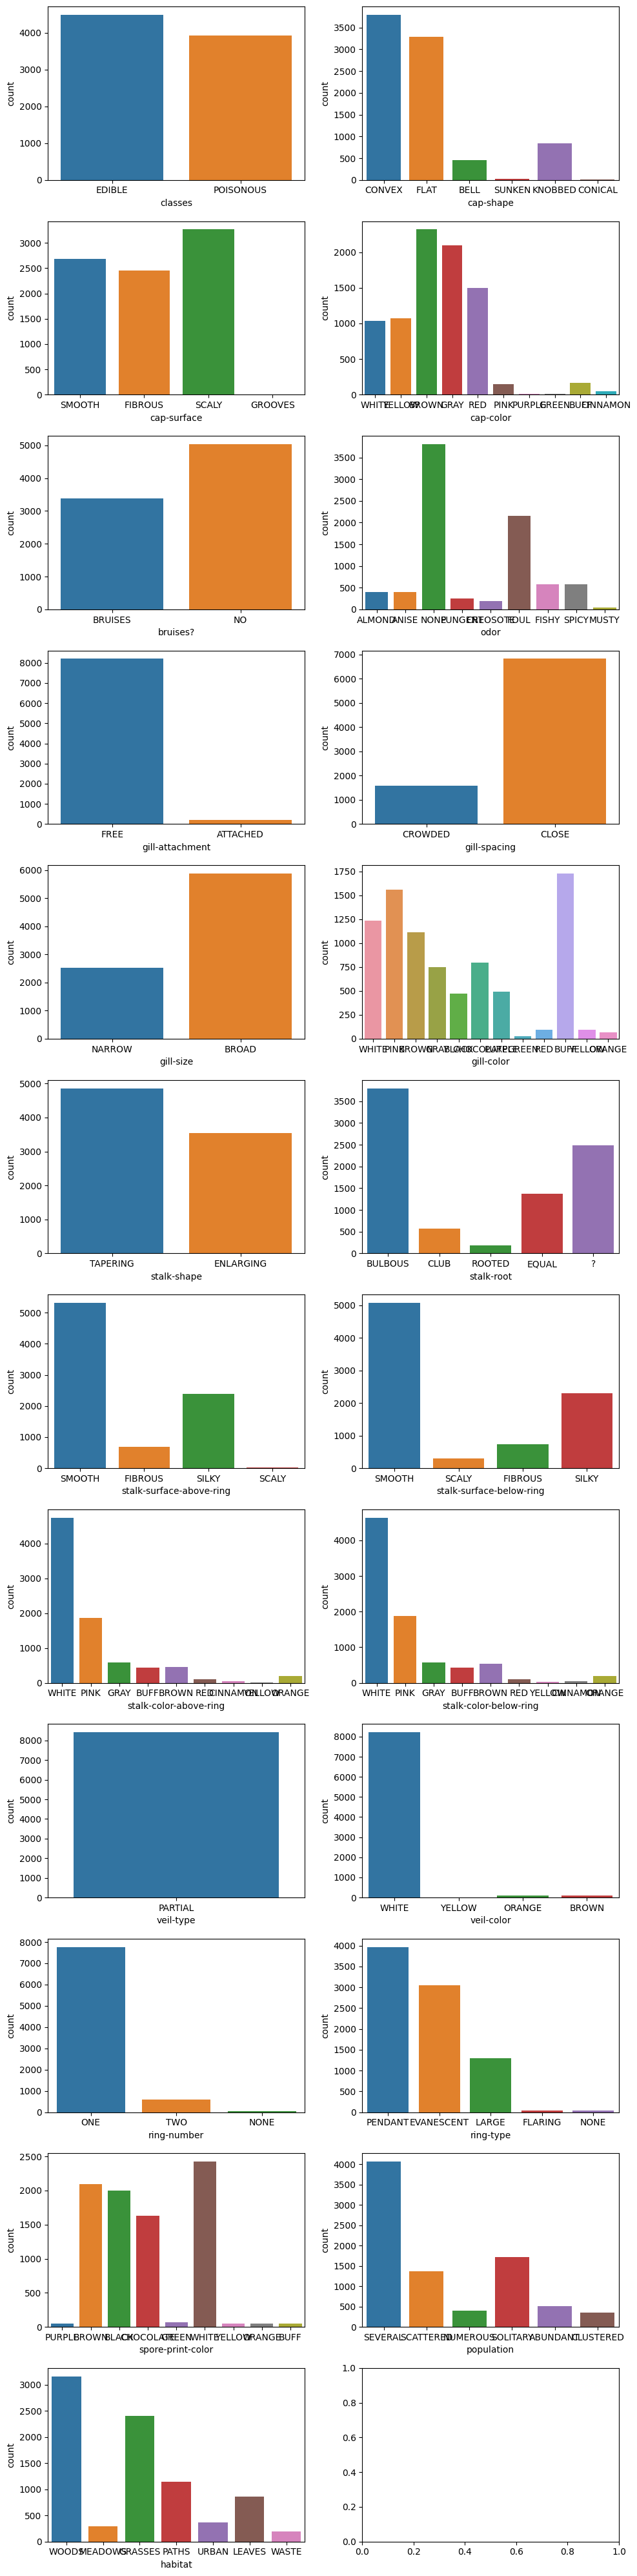

In [12]:
fig, axs = plt.subplots(
    ncols=2,
    nrows=12,
    figsize=(10, 40)
)
cont = 0
for i in range(12):
    if cont == 23: break
    for j in range(2):
        if cont == 23: break
        sns.countplot(
            x=names[cont],
            data=mushroom_ds,
            ax=axs[i,j]
        )
        cont+=1
        
fig.tight_layout()

### Preparación de los datos
#### Eliminación del atributo *veil-type*
Como se puede apreciar en la distribución de los datos, el atributo *veil-type* que corresponde al *tipo de velo* del hongo solo cuenta con un tipo de dato para ambas clases, por tanto, puede eliminarse ya que no aporta más información para identificar si un hongo es comestible o venenoso


In [13]:
# Eliminación del atributo
mushroom_ds = mushroom_ds.drop(['veil-type'], axis=1)
names.remove('veil-type')
mushroom_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   classes                   8416 non-null   object
 1   cap-shape                 8416 non-null   object
 2   cap-surface               8416 non-null   object
 3   cap-color                 8416 non-null   object
 4   bruises?                  8416 non-null   object
 5   odor                      8416 non-null   object
 6   gill-attachment           8416 non-null   object
 7   gill-spacing              8416 non-null   object
 8   gill-size                 8416 non-null   object
 9   gill-color                8416 non-null   object
 10  stalk-shape               8416 non-null   object
 11  stalk-root                8416 non-null   object
 12  stalk-surface-above-ring  8416 non-null   object
 13  stalk-surface-below-ring  8416 non-null   object
 14  stalk-color-above-ring  

#### Transformación de los valores categóricos a numéricos
Debido a que toda la información recopilada es de tipo nominal, es necesario realizar una transformación a valores numéricos con el fin de poder realizar un análisis más exhaustivo de los datos


In [14]:
num_names = [f'num_{x}' for x in names]

for i in names:
    mushroom_ds[f'num_{i}'] = LabelEncoder().fit_transform(mushroom_ds[i])
mushroom_ds[num_names].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   num_classes                   8416 non-null   int32
 1   num_cap-shape                 8416 non-null   int32
 2   num_cap-surface               8416 non-null   int32
 3   num_cap-color                 8416 non-null   int32
 4   num_bruises?                  8416 non-null   int32
 5   num_odor                      8416 non-null   int32
 6   num_gill-attachment           8416 non-null   int32
 7   num_gill-spacing              8416 non-null   int32
 8   num_gill-size                 8416 non-null   int32
 9   num_gill-color                8416 non-null   int32
 10  num_stalk-shape               8416 non-null   int32
 11  num_stalk-root                8416 non-null   int32
 12  num_stalk-surface-above-ring  8416 non-null   int32
 13  num_stalk-surface-below-ring  841

### Análisis de datos.


#### Análisis Correlación
Con el fin de saber si los atributos se encuentran correlacionados, se va a realizar una gráfica de calor con los valores numéricos de los atributos transformados en el punto anterior.

<Axes: >

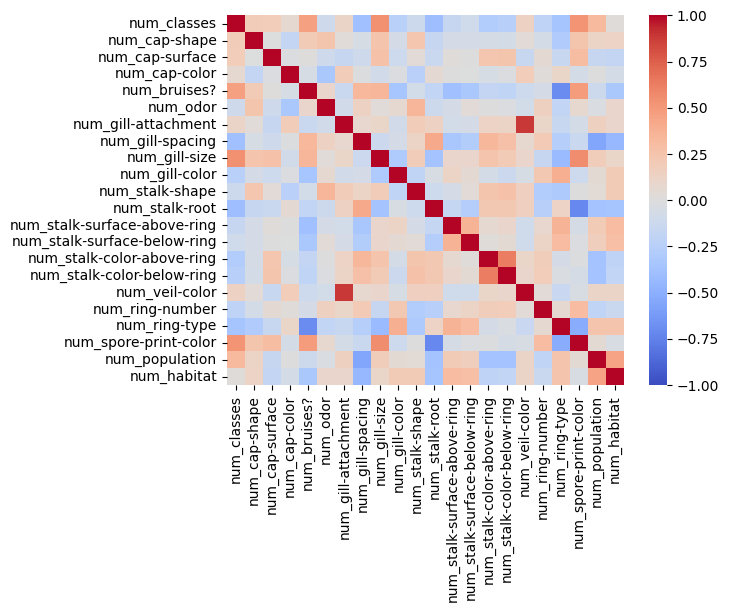

In [15]:
sns.heatmap(
    mushroom_ds.corr(numeric_only=True),
    cmap='coolwarm',
    vmin=-1, 
    vmax=1
)

In [16]:
mushroom_ds.corr(numeric_only=True)['num_classes'].abs().sort_values()[::-1]

num_classes                     1.000000
num_gill-size                   0.540032
num_spore-print-color           0.526650
num_bruises?                    0.462454
num_stalk-root                  0.404004
num_gill-spacing                0.383756
num_ring-type                   0.354800
num_population                  0.317748
num_stalk-color-above-ring      0.282161
num_stalk-color-below-ring      0.253467
num_gill-color                  0.245171
num_ring-number                 0.206384
num_cap-shape                   0.193963
num_cap-surface                 0.186720
num_stalk-surface-above-ring    0.160842
num_veil-color                  0.138498
num_stalk-shape                 0.122572
num_gill-attachment             0.115691
num_odor                        0.103957
num_stalk-surface-below-ring    0.099023
num_cap-color                   0.069717
num_habitat                     0.018461
Name: num_classes, dtype: float64

Analizando el mapa de calor se puede observar que existe una moderada correlación entre *gill-attachment* y *veil-color*. Tambien cabe resaltar que no existe tanto una correlación como una  covarianza significantiva entre los atributos.

#### Análisis estadístico

##### Cantidad de hongos de la muestra por el tamaño de las membranas
Como se puede evidenciar en la siguiente gráficala mayoria de los hongos que tienen membranas angostas son venenosos, caso contrario con los que presentan membranas amplias


<Axes: title={'center': 'Cantidad de hongos de la muestra por sus membranas'}, xlabel='gill-size', ylabel='Cantidad'>

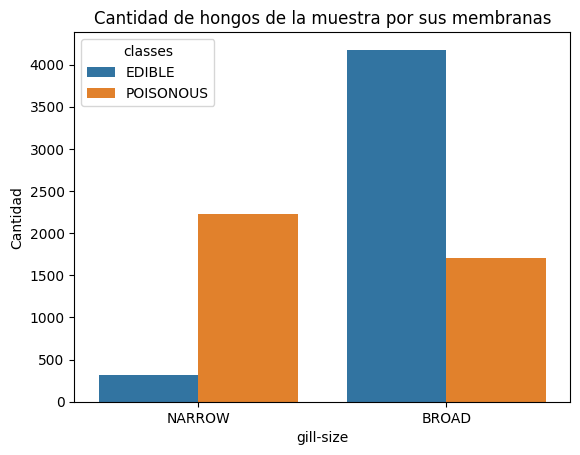

In [17]:
count_habitat_graph = sns.countplot(
    x='gill-size',
    hue='classes',
    data=mushroom_ds)
count_habitat_graph.set_title('Cantidad de hongos de la muestra por sus membranas')
count_habitat_graph.set_ylabel('Cantidad')
count_habitat_graph

##### Cantidad de hongos de la muestra por color de las esporadas
Como se puede visualizar en el siguiente gráfico y observando su distribución se puede identificar que la mayoría de los colores de las esporas de los hongos son negras, café, chocolate y blancas. Ademáe, hay una mayor probabilidad de encontrar hongos comestibles con esporas de color negro y café, en cambio, la mayoría de los hongos con esporas de color chocolate y blancas son venenosos.  



<Axes: title={'center': 'Cantidad de hongos de la muestra por color de sus esporadas'}, xlabel='spore-print-color', ylabel='Cantidad'>

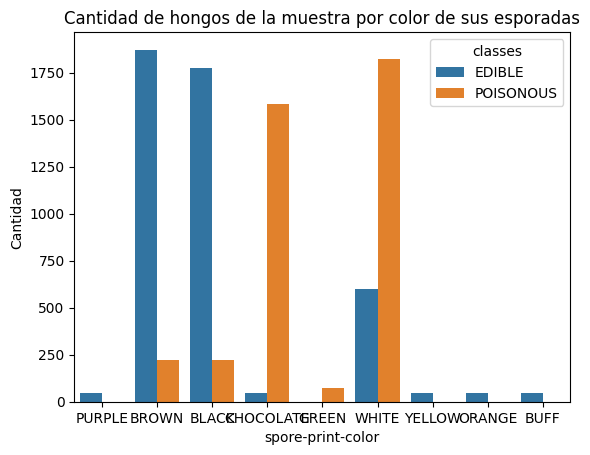

In [18]:
count_habitat_graph = sns.countplot(
    x='spore-print-color',
    hue='classes',
    data=mushroom_ds)
count_habitat_graph.set_title('Cantidad de hongos de la muestra por color de sus esporadas')
count_habitat_graph.set_ylabel('Cantidad')
count_habitat_graph

##### Cantidad de hongos de la muestra por la presencia de moretones
La mayoría de los hongos comestibles de la muestra presentan moretones y los venenosos no suelen presentar moretones. Aunque este no es un atributo que pueda distinguir un hongo comestible de uno venenoso


<Axes: title={'center': 'Cantidad de hongos de la muestra por la presencia de moretones'}, xlabel='bruises?', ylabel='Cantidad'>

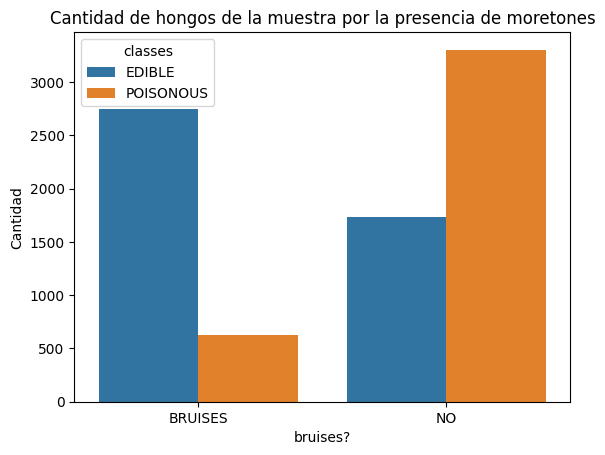

In [19]:
count_habitat_graph = sns.countplot(
    x='bruises?',
    hue='classes',
    data=mushroom_ds)
count_habitat_graph.set_title('Cantidad de hongos de la muestra por la presencia de moretones')
count_habitat_graph.set_ylabel('Cantidad')
count_habitat_graph

##### Cantidad de hongos de la muestra por el tallo de la raíz
Los hongos con el tallo de la raíz de la muestra se componen en su mayoría de bulbosos, iguales o no se identifica una clasificación. Los tallos de la raíz bulbosos no pueden clasificarse ni comestible ni venenoso, pero los que son enraizados son 100% comestibles y los que no son clasificados pueden ser en su mayoría venenoso.




<Axes: title={'center': 'Cantidad de hongos de la muestra por el tallo de la raíz'}, xlabel='stalk-root', ylabel='Cantidad'>

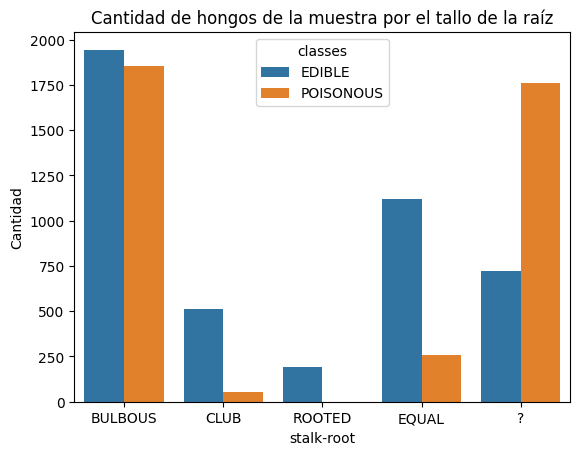

In [20]:
count_habitat_graph = sns.countplot(
    x='stalk-root',
    hue='classes',
    data=mushroom_ds)
count_habitat_graph.set_title('Cantidad de hongos de la muestra por el tallo de la raíz')
count_habitat_graph.set_ylabel('Cantidad')
count_habitat_graph

##### Cantidad de hongos de la muestra por el espaciado de sus membranas
Se puede evidenciar que la malloria de los hongos que tienen membranas apiñadas son comestibles.

<Axes: title={'center': 'Cantidad de hongos de la muestra por el espaciado de sus membranas'}, xlabel='gill-spacing', ylabel='Cantidad'>

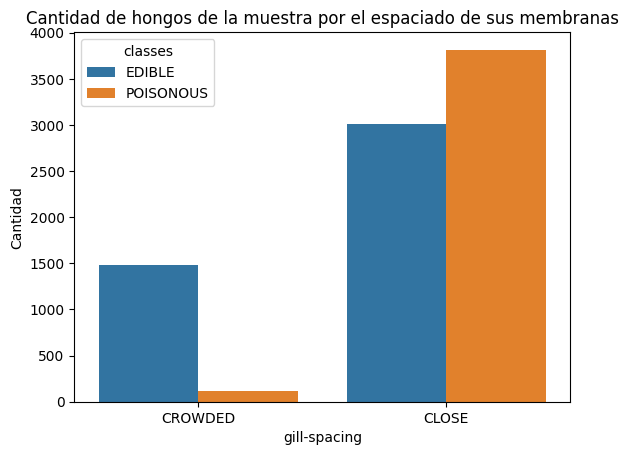

In [21]:
count_habitat_graph = sns.countplot(
    x='gill-spacing',
    hue='classes',
    data=mushroom_ds)
count_habitat_graph.set_title('Cantidad de hongos de la muestra por el espaciado de sus membranas')
count_habitat_graph.set_ylabel('Cantidad')
count_habitat_graph

##### Cantidad de hongos de la muestra por su tipo de anillo
La mayoria de los hongos de la muestra que tienen un anillo colgante son comestibles y los que tienen anillos largos son todos venenosos

<Axes: title={'center': 'Cantidad de hongos de la muestra por su tipo de anillo'}, xlabel='ring-type', ylabel='Cantidad'>

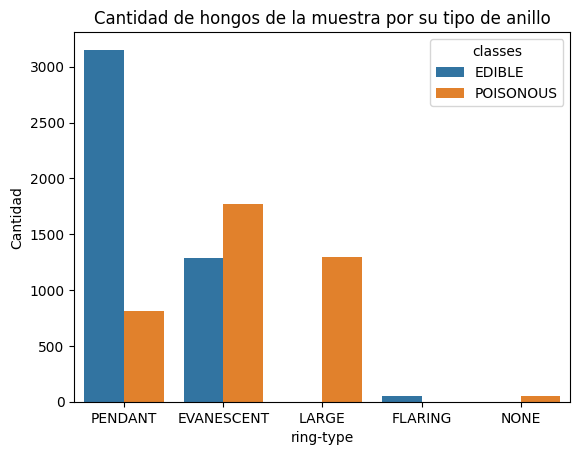

In [22]:
count_habitat_graph = sns.countplot(
    x='ring-type',
    hue='classes',
    data=mushroom_ds)
count_habitat_graph.set_title('Cantidad de hongos de la muestra por su tipo de anillo')
count_habitat_graph.set_ylabel('Cantidad')
count_habitat_graph

<Axes: title={'center': 'Cantidad de hongos de la muestra por su olor'}, xlabel='odor', ylabel='Cantidad'>

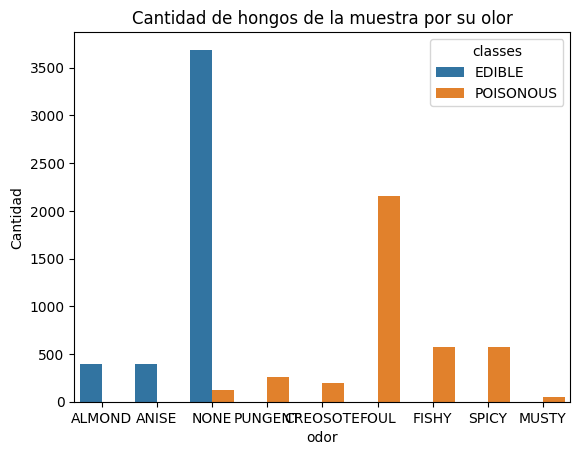

In [23]:
count_habitat_graph = sns.countplot(
    x='odor',
    hue='classes',
    data=mushroom_ds)
count_habitat_graph.set_title('Cantidad de hongos de la muestra por su olor')
count_habitat_graph.set_ylabel('Cantidad')
count_habitat_graph

<Axes: title={'center': 'Cantidad de hongos de la muestra por la prececia de moretones'}, xlabel='bruises?', ylabel='Cantidad'>

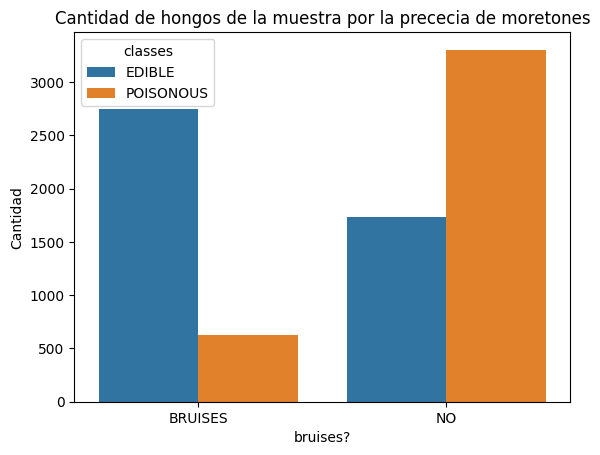

In [24]:
count_habitat_graph = sns.countplot(
    x='bruises?',
    hue='classes',
    data=mushroom_ds)
count_habitat_graph.set_title('Cantidad de hongos de la muestra por la prececia de moretones')
count_habitat_graph.set_ylabel('Cantidad')
count_habitat_graph

##### Cantidad de hongos de la muestra por su tipo de población
La mayoria de los hongos venenosos que crecen de a varios y los hongos que son abundantes y numerosos son comestibles

<Axes: title={'center': 'Cantidad de hongos de la muestra por su tipo de población'}, xlabel='population', ylabel='Cantidad'>

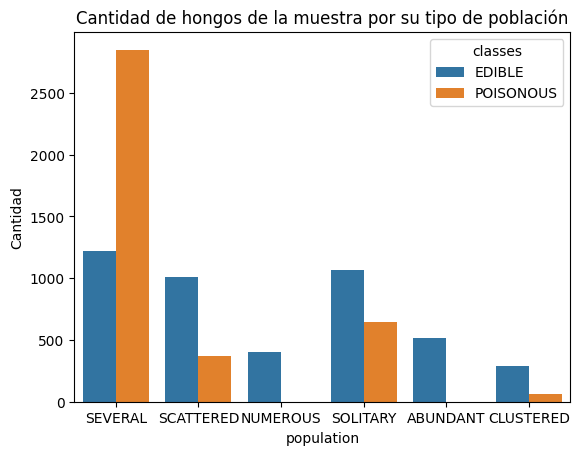

In [25]:
count_habitat_graph = sns.countplot(
    x='population',
    hue='classes',
    data=mushroom_ds)
count_habitat_graph.set_title('Cantidad de hongos de la muestra por su tipo de población')
count_habitat_graph.set_ylabel('Cantidad')
count_habitat_graph

C:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


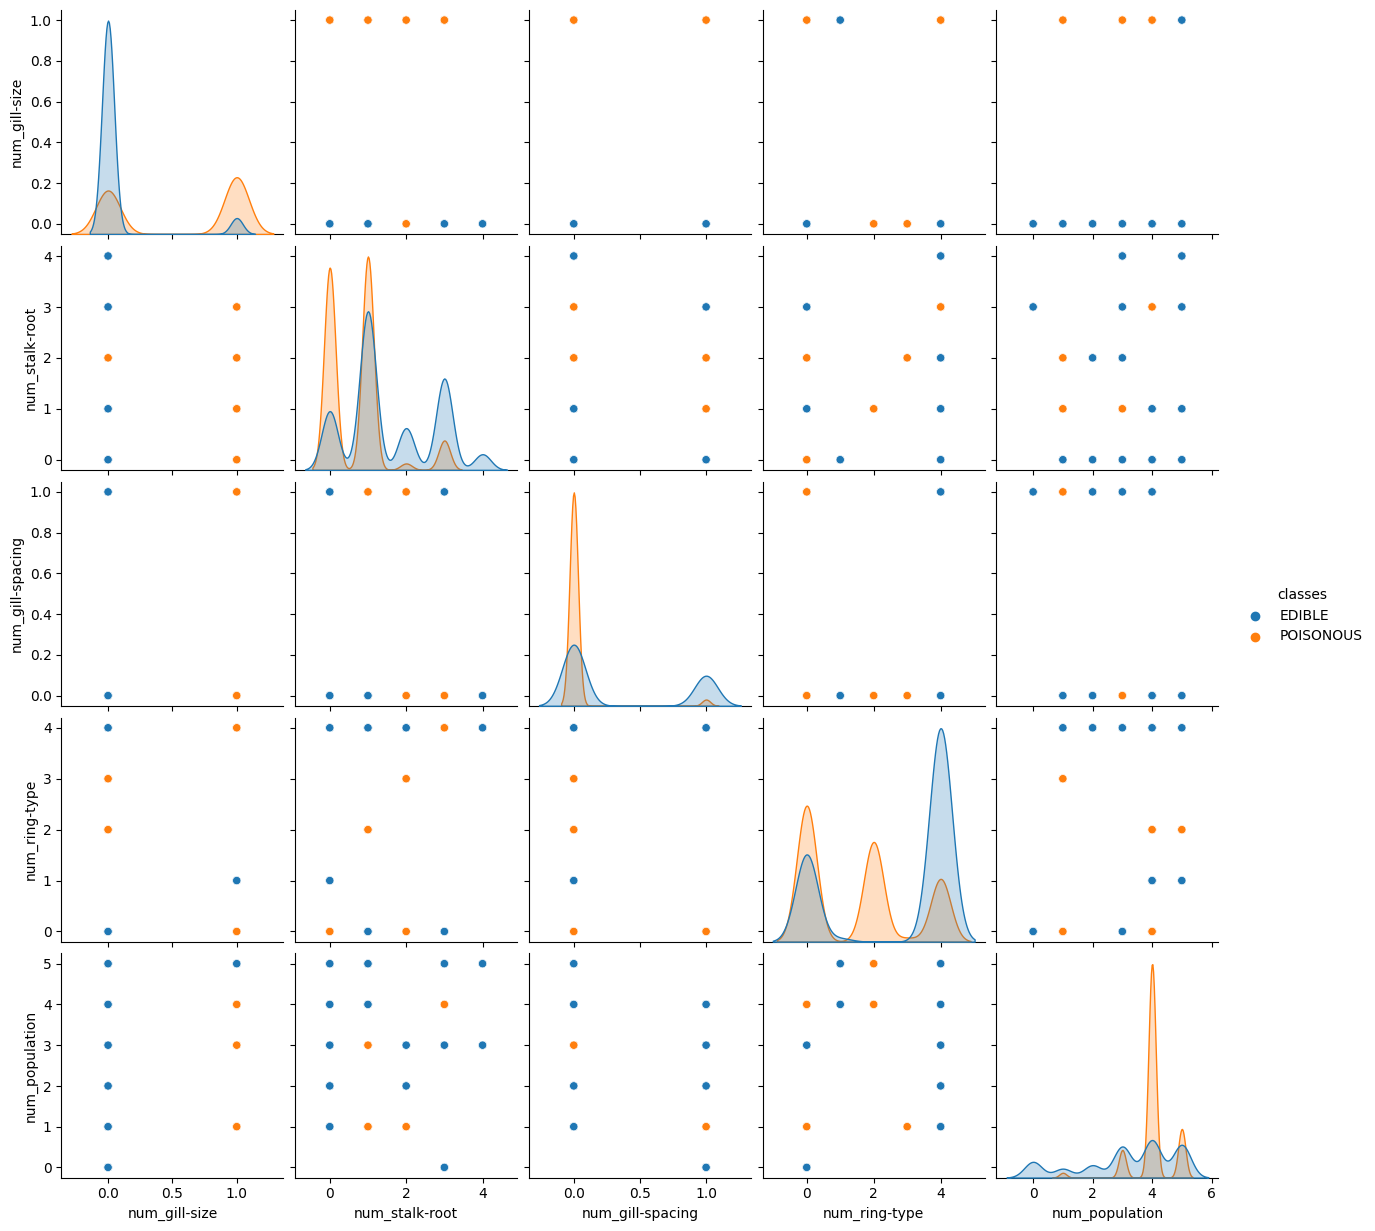

In [26]:
pairplot = sns.pairplot(data=
                        mushroom_ds[[
                            'classes',
                            'num_gill-size',
                            'bruises?',
                            'num_stalk-root',
                            'num_gill-spacing',
                            'num_ring-type',
                            'num_population'
                        ]], 
                        hue='classes'
                       )
pairplot.savefig("mushroom_pairplot.pdf")

Mediante el grafico de dispersión por cada uno de los atributos escogidos durante el análisis estadístico se puede visualizar que no todos presentan alguna clase de patrón con la cual se pueda definir una función que describa su comportamiento. Se necesitaría de otras técnicas para poder clasificar los hongos con los atributos escogidos.